---
# Help Wanted
- A study of the Impact of COVID-19 on the Texas Job Market
---
##### By
- Jeff Akins
- James Allen
- Curtis Johansen
- Veronica Reyes
- Adam Talbot

#### 
![](https://cdn.pixabay.com/photo/2016/09/09/10/43/texas-1656861_1280.jpg)

---
## Project Goal
This project explored the impact of COVID-19 on the Texas job market. 98 Industries were examined using a combination of U.S. Census data and Texas Labor Market Information. Clustering analysis was used to group the industries into seven categories based on the magnitude of their job loss during the first half of 2020. For the industries that were most affected, subcategories were examined such as gender, age group, education, race, and ethnicity. Time Series modeling was then used to forecast when select industries would return to pre-COVID levels of employment. 

---
## Executive Summary

After examining the impact of COVID-19 on the Texas job market, we discovered that out of the 98 industries examined, we could categorize those industries into seven distinct groupings based on their total employment trends.

**Goals:**
- #####

**Conclusions/Takaways:**
- #####

**Next Steps/Recommendations:**
- #####

---
## Plan
---

- [x] Create README.md with data dictionary, project and business goals, come up with initial hypotheses.
- [x] Acquire data from Kaggle, save to local .csv and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.
- [x] Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.
- [x] Clearly define at least two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
- [x] Establish a baseline accuracy and document well.
- [x] Train several different regression models.
- [x] Evaluate models on train and validate datasets.
- [x] Choose the model with that performs the best and evaluate that single model on the test dataset.
- [x] Document conclusions, takeaways, and next steps in the Final Report Notebook.
- [x] Iterate back through the pipeline imporving each phase as time permits

---
## Imports
---

In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

# sklearn imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# pickle for reloading model object
import pickle

# visualization settings
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
sns.set_palette('tab20')

# custom modules
import wrangle as w
import explore as e

---
## Acquire
Our data was acquired from the [U.S. Census Bureau](https://ledextract.ces.census.gov/static/data.html)

As well as from the [Texas Labor Market](https://texaslmi.com/LMIbyCategory/QCEW)

If you would like to download the exact data that we used then click the links below:

[US Census Overview](https://drive.google.com/file/d/1Rteq1rsyC6E6RFdc1fZ_oVWjhUIviF_t/view?usp=sharing)

[US Census with Age Subgroups](https://drive.google.com/file/d/1TOpkBlrnXzC8b66vo6SM-jXqwkgq2102/view?usp=sharing)

[US Census with Education Subgroups](https://drive.google.com/file/d/1WKscioAiYuAK4wkkgMA60s5b7YG55aMB/view?usp=sharing)

[US Census with Race and Ethnicity Subgroups](https://drive.google.com/file/d/1WTgBeApiKyn6hpT_FaCalN8O6sYsBANF/view?usp=sharing)

#### Below are the full Dataframes before Cleaning:

In [2]:
# Census Data with no Subgroups:
census = pd.read_csv('census_data_overview.csv')
# Census Data with Education Subgroups:
census_ed = pd.read_csv('LaborMarketWEducation.csv')
# Census Data with Age Subgroups:
census_age = pd.read_csv('LaborMarketWAge.csv')
# Census Data with Race and Ethnicity Subgroups:
census_race = pd.read_csv('LaborMarketWRace.csv')

### Takeaways:
- #####

---
## Prepare
---

### Clean

In [3]:
# Function to Clean the Texas Census Data with no Subgroups:
census_light = w.wrangle_census_data()

In [4]:
# Function to Clean the Texas Census Data with Education Subgroups:
ed = w.education_census_data()

In [5]:
# Function to Clean the Texas Census Data with Age Subgroups:
age = w.age_census_data()

In [6]:
# Function to Clean the Texas Census Data with Race and Ethnicity Subgroups:
r = w.race_census_data()

---

#### Preparation Performed:
- #####

---
## Explore 
---

### All Level 3 Industries

In [7]:
# Function to calculate Texas Job Loss by Industry over the first half of 2020:
job_loss = e.q1_minus_q3_emp(census_light)

#### Plot of Texas Job Losses by Industry over the first half of 2020

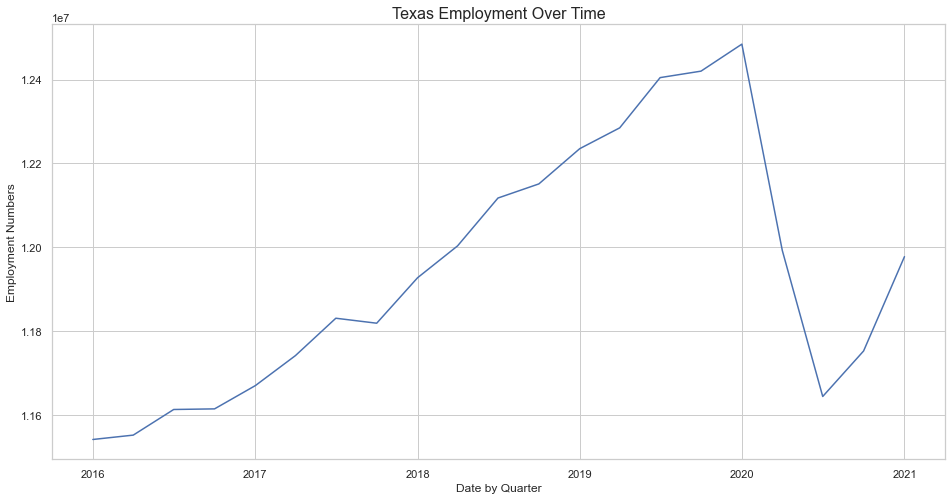

In [17]:
sum_by_date = census_light.groupby('date').sum()
plt.figure(figsize=(16,8))
sns.lineplot(x="date", y="Emp",
                palette="ch:r=-.2,d=.3_r",
                data=sum_by_date)
plt.title('Texas Employment Over Time', fontsize=16)
plt.xlabel('Date by Quarter')
plt.ylabel('Employment Numbers')
plt.show()

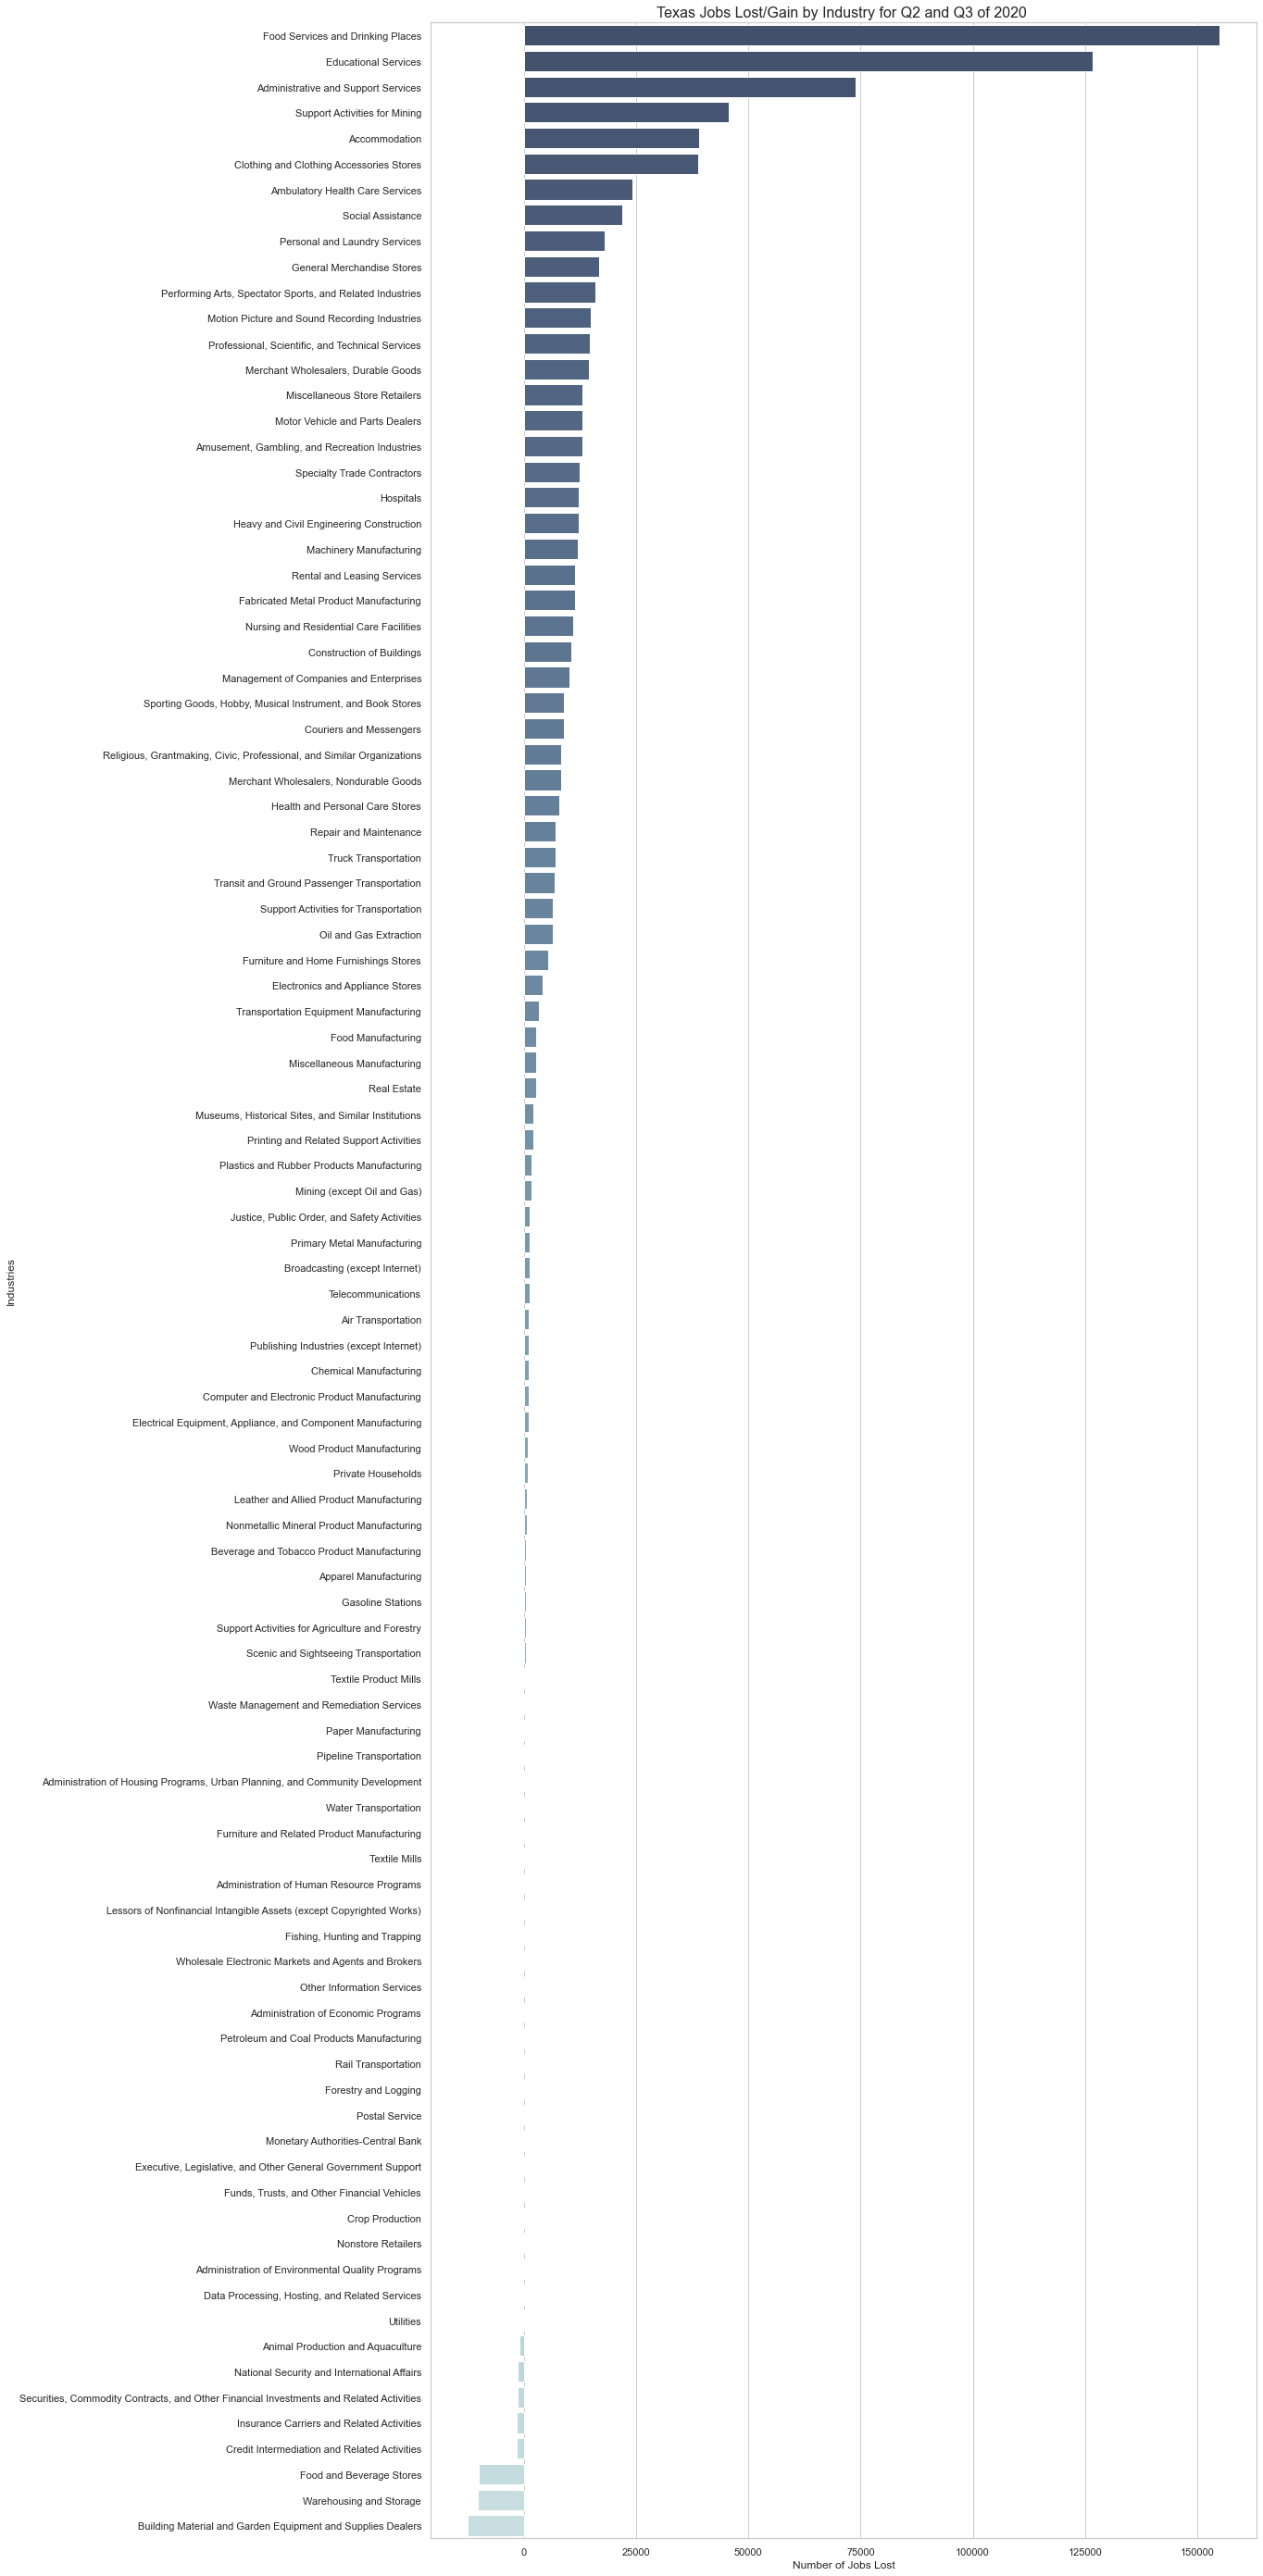

In [10]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16,50))
sns.barplot(x="q1_minus_q3", y="industry_name",
                palette="ch:r=-.2,d=.3_r",
                data=job_loss, alpha=1)
plt.title('Texas Jobs Lost/Gain by Industry for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

#### Timeline of Employment for the Top Three Industries in the Above Chart

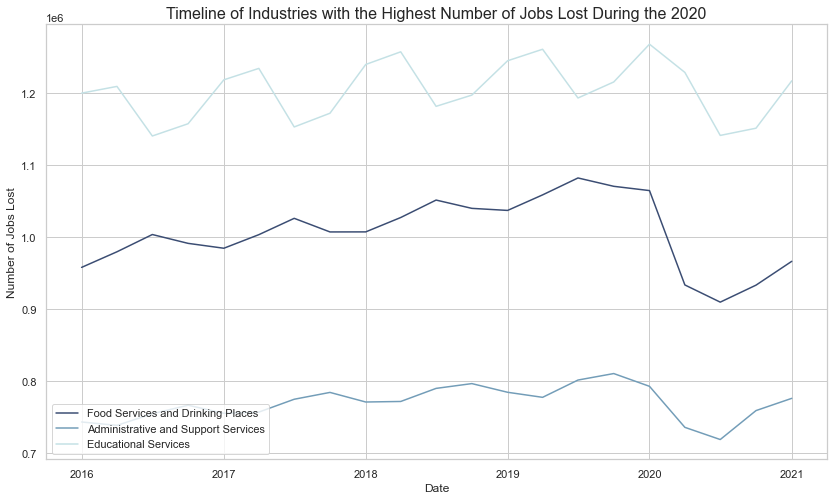

In [25]:
census_lighter = e.select_industries(census_light, 722, [561, 611])
plt.figure(figsize=(14,8))
sns.lineplot(x="date", y="Emp",
            hue="industry_name", palette="ch:r=-.2,d=.3_r",
            data=census_lighter)
plt.title('Timeline of Industries with the Highest Number of Jobs Lost During the 2020', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Jobs Lost')
plt.legend(loc="lower left")
plt.show()

### Industries with highest number of job loss compared to the industry size i.e. Normalized

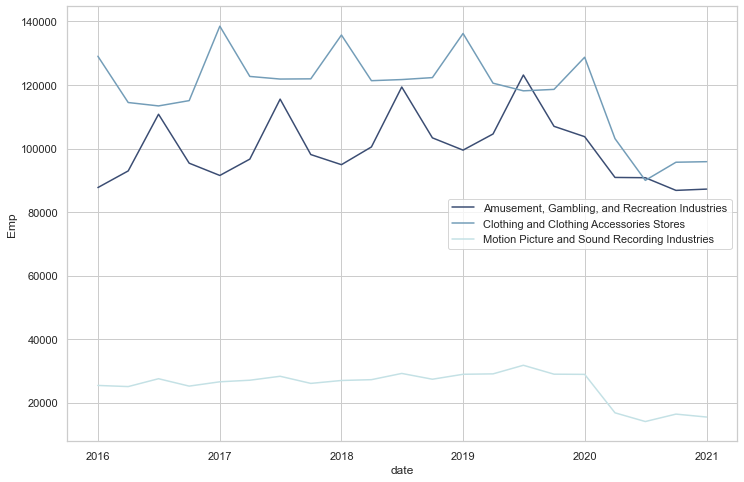

In [24]:
census_lighter1 = e.select_industries(census_light, 713, [448, 512])
plt.figure(figsize=(12,8))
sns.lineplot(x="date", y="Emp",
            hue="industry_name", palette="ch:r=-.2,d=.3_r",
            data=census_lighter1)
plt.legend()
plt.show()

#### Takeaways:
- #####

---
### Demographic Subgroups
---


#### Job loss by Employee Education Level for the Industries that loss the most Jobs

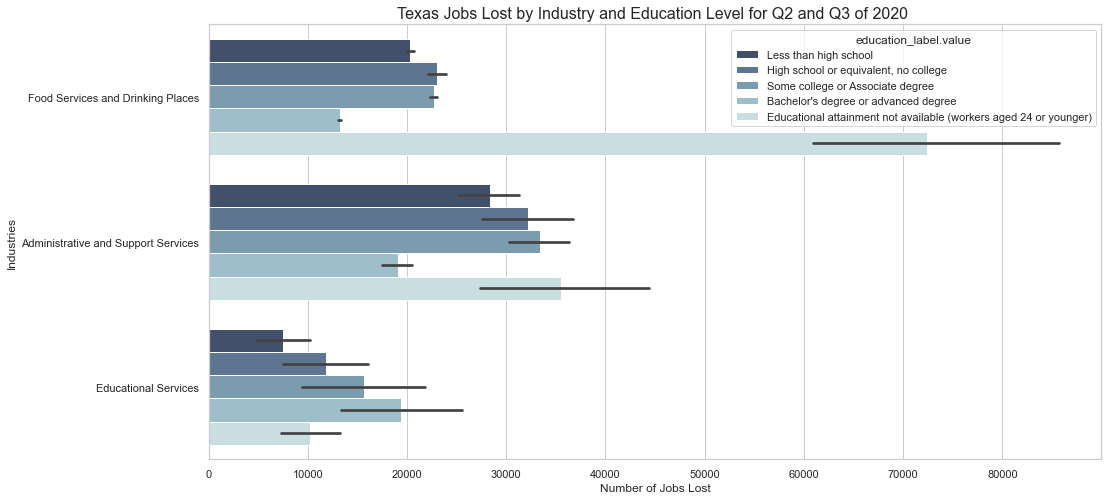

In [28]:
# Selecting the industries with the highest number of job losses
ed_top = e.select_industries(ed, 722, [561, 611])
# Selecting Q2 and Q3 2020:
ed_q2q3_sep = ed_top[(ed_top.date == '2020-04-01') | (ed_top.date == '2020-07-01')]

plt.figure(figsize=(16,8))
sns.barplot(x="Sep", y="industry_name",
                hue='education_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=ed_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Education Level for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

#### Job loss by Male/Female for the Industries that loss the most Jobs

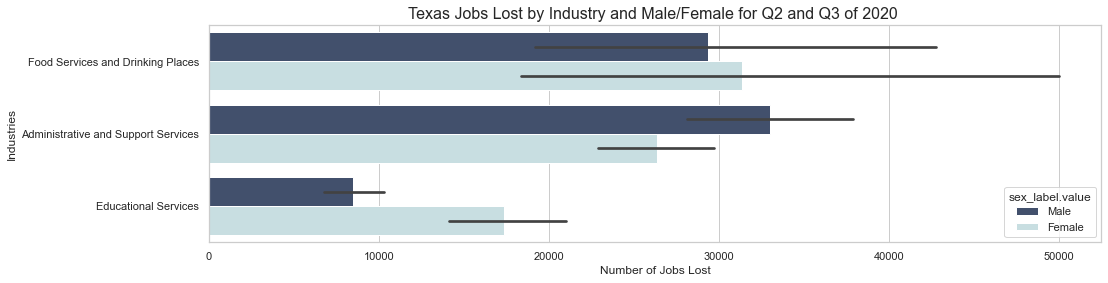

In [30]:
plt.figure(figsize=(16,4))
sns.barplot(x="Sep", y="industry_name",
                hue='sex_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=ed_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Male/Female for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

#### Job loss by Employee Age Groups for the Industries that loss the most Jobs

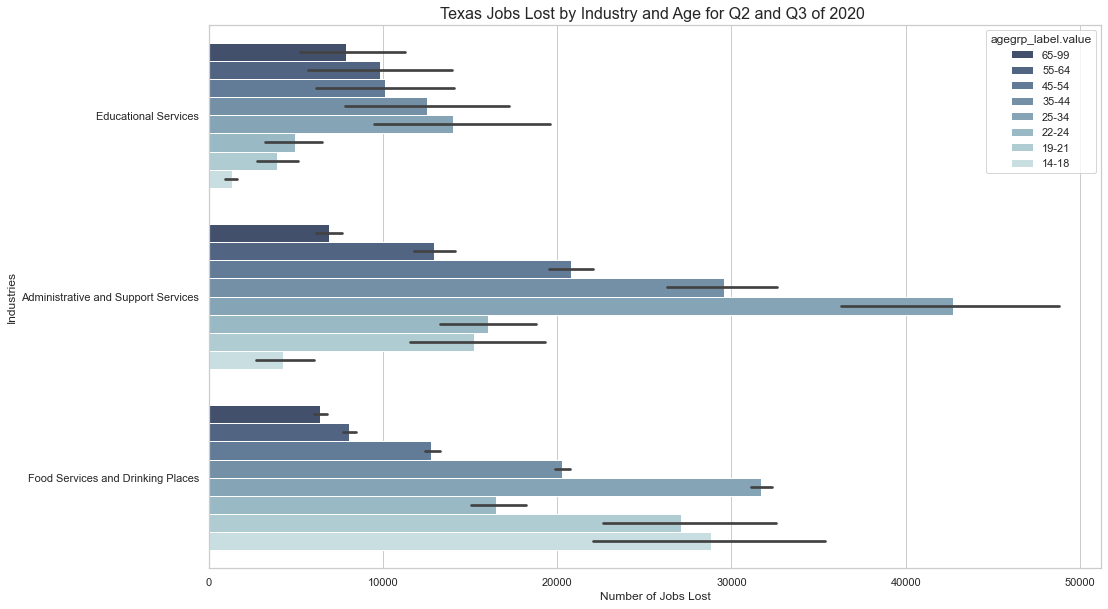

In [43]:
age_top = e.select_industries(age, 722, [561, 611])
age_q2q3_sep = age_top[(age_top.date == '2020-04-01') | (age_top.date == '2020-07-01')].sort_values('agegrp_label.value', ascending=False)
# age_q2q3_sep = e.q1_minus_q3_emp(age_top)

plt.figure(figsize=(16,10))
sns.barplot(x="Sep", y="industry_name",
                hue='agegrp_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=age_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Age for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

#### Job loss by Employee Race and Ethnicity for the Industries that loss the most Jobs

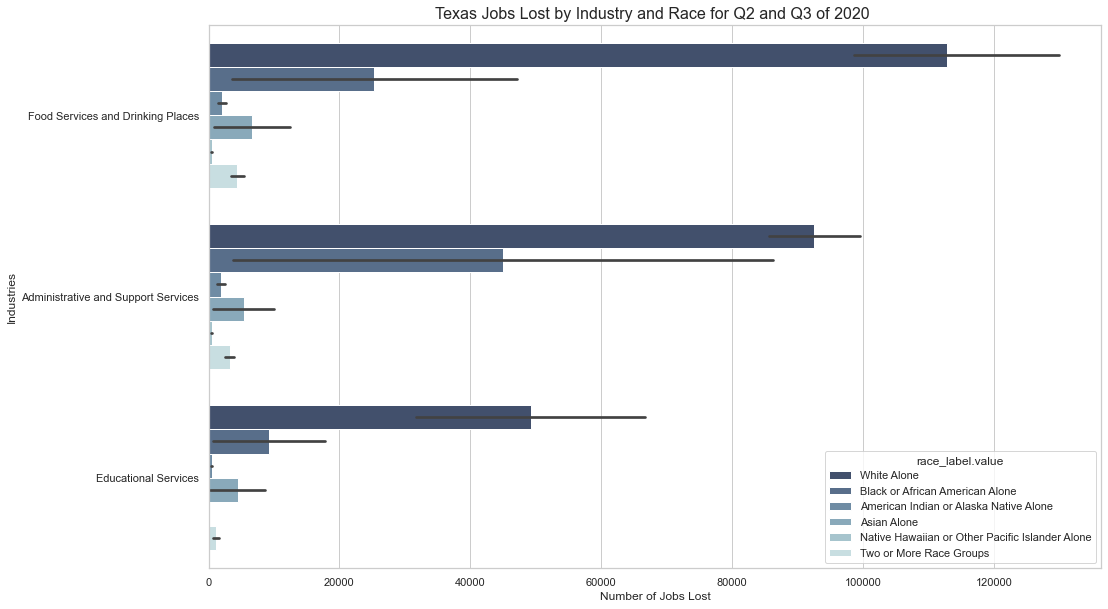

In [38]:
r_top = e.select_industries(r, 722, [561, 611])
r_q2q3_sep = r_top[(r_top.date == '2020-04-01') | (r_top.date == '2020-07-01')]

plt.figure(figsize=(16,10))
sns.barplot(x="Sep", y="industry_name",
                hue='race_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=r_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Race for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

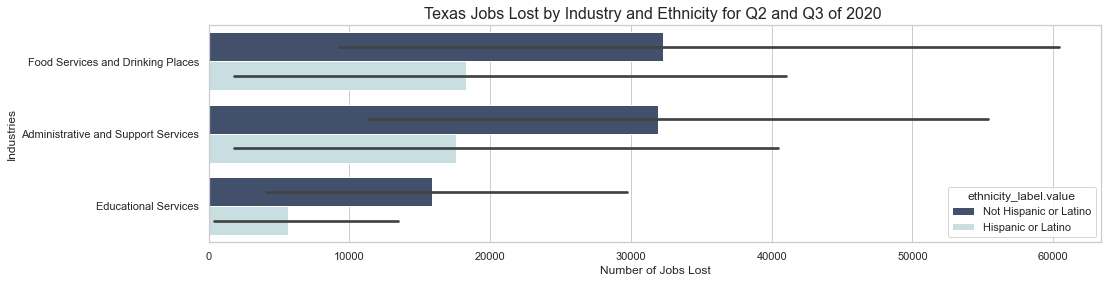

In [39]:
plt.figure(figsize=(16,4))
sns.barplot(x="Sep", y="industry_name",
                hue='ethnicity_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=r_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Ethnicity for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

#### Takeaways:
- ######

---
### Clustering
---


In [ ]:
# load model
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

In [ ]:
# Reset plot background
plt.style.use('seaborn-darkgrid')
# acquire and prep data
df = w.get_tx_data()
# subset data into a dictionary of dfs
industry_df_dict, ind_list = w.create_df_dict(df)
# charaterize series of data for each industry to make time series data into continuous data we can cluster on
char_df = e.create_char_df(industry_df_dict, ind_list)
# scale these characterizations for clustering
scaled_char_df = e.scale(char_df, MinMaxScaler())
# cluster and plot results
char_df = e.load_cluster_and_plot_no_legend(loaded_model, scaled_char_df, char_df, df)

---
**Human-Friendly Labels for each Cluster:**
- Moderate Negative Impact, Quick Recovery
- Positively Impacted
- Significant Negative Impact, Mostly Recovered
- Significant Negative Impact, Mostly Recovered, Highly Seasonal
- No Impact
- Moderate Negative Impact, Slow or No Recovery
- Minor Negative Impact, Quick Recovery
**See if you can identify which is which!**

---

In [ ]:
char_df = e.load_cluster_and_plot_w_legend(loaded_model, scaled_char_df, char_df, df)

In [ ]:
# this function will do whole pipeline from acquire to final clustering plots
# e.load_acquire_to_cluster(loaded_model)

#### Takeaways:
- Clustering models were able to group times series data for different industries into groups that make sense
- The clusters produced along with number of industries in each group were:
    - Moderate Negative Impact, Quick Recovery : 38
    - Minor Negative Impact, Quick Recovery : 24
    - Moderate Negative Impact, Slow or No Recovery : 9
    - Significant Negative Impact, Mostly Recovered : 9
    - Positively Impacted : 9
    - Significant Negative Impact, Mostly Recovered, Highly Seasonal : 3
    - No Impact: 3

---
### Explore Takeaways:
- #####

---
## Conclusions and Next Steps
---

**Conclusions/Takaways:**
- #####

**Next Steps/Recommendations:**
- #####